In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error
import random
from sklearn.linear_model import SGDRegressor


In [2]:
df1 = pd.read_csv('./datasets/teste_08_06.csv')
df1 = df1[['compute_version','registers','smem','cmem','num_of_cores','L2','bandwith','theoretical_flops','AppId','number_of_lines_kernel','occupancy','input_size','duration','block_x']]
df1 = df1.select_dtypes(exclude=['object'])
df1 = df1.sort_values(by='input_size', ascending=True)


In [164]:
df = df1.groupby('AppId').count()
df

,compute_version,registers,smem,cmem,num_of_cores,L2,bandwith,theoretical_flops,number_of_lines_kernel,occupancy,input_size,duration,block_x
AppId,,,,,,,,,,,,,
1,752,752,752,752,752,752,752,752,752,752,752,752,752
2,752,752,752,752,752,752,752,752,752,752,752,752,752
3,752,752,752,752,752,752,752,752,752,752,752,752,752
4,752,752,752,752,752,752,752,752,752,752,752,752,752
5,832,832,832,832,832,832,832,832,832,832,832,832,832
6,832,832,832,832,832,832,832,832,832,832,832,832,832
7,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649
8,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586
9,552,552,552,552,552,552,552,552,552,552,552,552,552


In [192]:
for i in range(1,10):
    print(i)
    c = len(df1.loc[df1['AppId'] == i])
   
    while  c < 1000:
        #print(len(df1.loc[df1['AppId'] == i]))
        ids = list(df1.loc[df1['AppId'] == i].index)
        new_row = df1.iloc[random.choice(ids)]
        df1 = df1.append(new_row, ignore_index=True)
        c += 1
        #print(len(df1))


1


/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futur

2


/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futur

3


/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futur

4


/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futur

5


/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futur

6


/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futur

7
8
9


/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(new_row, ignore_index=True)
/tmp/ipykernel_10105/122505385.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futur

In [177]:
df = df1.groupby('AppId').count()
df

,compute_version,registers,smem,cmem,num_of_cores,L2,bandwith,theoretical_flops,number_of_lines_kernel,occupancy,input_size,duration,block_x
AppId,,,,,,,,,,,,,
1.0,999,999,999,999,999,999,999,999,999,999,999,999,999
2.0,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
3.0,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
4.0,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
5.0,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
6.0,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
7.0,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649
8.0,1587,1587,1587,1587,1587,1587,1587,1587,1587,1587,1587,1587,1587
9.0,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


In [179]:
df1

,compute_version,registers,smem,cmem,num_of_cores,L2,bandwith,theoretical_flops,AppId,number_of_lines_kernel,occupancy,input_size,duration,block_x
0,3.0,32.0,0.0,348.0,1536.0,0.50,192.256,3250.176,1.0,6.0,50.0,256.0,0.001242,8.0
1,5.2,8.0,0.0,348.0,2048.0,2.00,224.320,4980.736,6.0,5.0,100.0,256.0,0.000005,8.0
2,5.2,8.0,0.0,348.0,1664.0,1.75,224.320,3580.928,6.0,5.0,100.0,256.0,0.000006,8.0
3,5.2,27.0,2048.0,348.0,1664.0,1.75,224.320,3580.928,3.0,15.0,100.0,256.0,0.000240,16.0
4,5.2,8.0,0.0,348.0,3072.0,3.00,336.480,6610.944,6.0,5.0,100.0,256.0,0.000006,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10230,5.2,32.0,16392.0,344.0,3072.0,3.00,336.480,6610.944,9.0,41.0,31.0,247463936.0,0.044049,128.0
10231,3.5,28.0,16392.0,344.0,2688.0,1.50,288.384,4709.376,9.0,41.0,13.0,79691776.0,0.040141,128.0
10232,5.2,32.0,16392.0,344.0,1664.0,1.75,224.320,3580.928,9.0,41.0,31.0,142606336.0,0.021676,128.0
10233,3.5,28.0,16392.0,344.0,2304.0,1.00,192.256,3552.768,9.0,41.0,13.0,180355072.0,0.105602,128.0


In [150]:
df

,Name,Age
0,Tom,20
1,Joseph,21
2,Krish,19
3,John,18
4,Tom,20
5,Pedro,21
6,Krish,30
7,John,18


In [103]:
for i in range(1,9): 
    remove_n = len(df1.loc[df1['AppId'] == i ]) - 552
    remove_class = i
    # Here you first find the indexes where class is equal to the class you want to drop.
    #Then you slice only the first n indexes of this class
    if remove_n > 0:
        index_to_drop = df1.index[df1['AppId'] == remove_class][:remove_n]
        #Finally drop those indexes
        df1 = df1.drop(index_to_drop)

In [119]:
df = df1.groupby('AppId').count()
df

,compute_version,registers,smem,cmem,num_of_cores,L2,bandwith,theoretical_flops,number_of_lines_kernel,occupancy,input_size,duration,block_x
AppId,,,,,,,,,,,,,
1,752,752,752,752,752,752,752,752,752,752,752,752,752
2,752,752,752,752,752,752,752,752,752,752,752,752,752
3,752,752,752,752,752,752,752,752,752,752,752,752,752
4,752,752,752,752,752,752,752,752,752,752,752,752,752
5,832,832,832,832,832,832,832,832,832,832,832,832,832
6,832,832,832,832,832,832,832,832,832,832,832,832,832
7,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649,1649
8,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586,1586
9,552,552,552,552,552,552,552,552,552,552,552,552,552


In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder
print('Linear Regression')
for idApp in range(1,10):
    idApp = float(idApp)
    
    X_train = df1[df1['AppId'] != idApp]
    Y_train = df1[df1['AppId'] != idApp]['duration']
    X_test = df1[df1['AppId'] == idApp]
    Y_test = df1[df1['AppId'] == idApp]['duration']
    yTrain = np.log(Y_train + 0.0001)
    yTest = np.log(Y_test + 0.0001)
    
    yTrain_labels = LabelEncoder()
    yTrain = yTrain_labels.fit_transform(yTrain)
    yTest = yTrain_labels.fit_transform(yTest)
    lm_model = LinearSVC()
    lm_model.fit(X_train, yTrain)

    y_pred = lm_model.predict(X_test)
    print('Application: ', idApp,' ', mean_absolute_percentage_error(yTest, y_pred))


Linear Regression


KeyboardInterrupt: 

/home/luan/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/luan/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


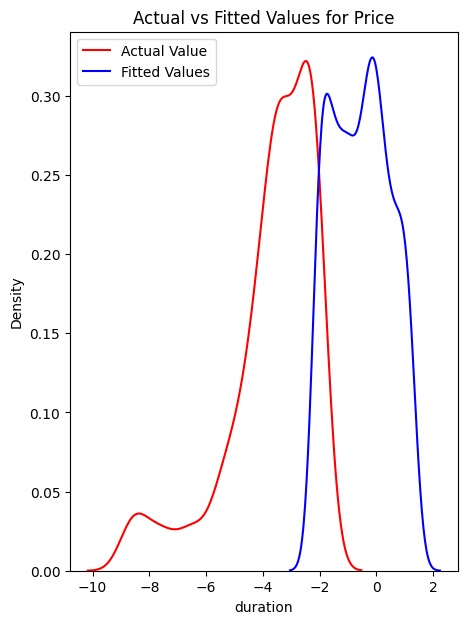

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 7))


ax = sns.distplot(yTest, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values",ax=ax)


plt.title('Actual vs Fitted Values for Price')
plt.legend()


plt.show()
plt.close()

In [11]:
# linear regression
def predict_row(row, coefficients):
	# add the bias, the last coefficient
	result = coefficients[-1]
	# add the weighted input
	for i in range(len(row)):
		result += coefficients[i] * row[i]
	return result

def predict_dataset(X, coefficients):
        yhats = list()
        for row in X:
            # make a prediction
            yhat = predict_row(row, coefficients)
            # store the prediction
            yhats.append(yhat)
        return yhats

In [14]:
print('Linear Regression')
for idApp in range(1,2):
    idApp = float(idApp)
    
    X_train = df1[df1['AppId'] != idApp]
    Y_train = df1[df1['AppId'] != idApp]['duration']
    X_test = df1[df1['AppId'] == idApp]
    Y_test = df1[df1['AppId'] == idApp]['duration']

    yTrain = np.log(Y_train + 0.01)
    yTest = np.log(Y_test + 0.01)

    X, y = make_regression(n_samples=1000, n_features=14, n_informative=2, noise=0.2, random_state=1)
    n_coeff = X_train.shape[1] + 1
    # generate random coefficients
    print(n_coeff)

Linear Regression
15
